In [1]:
import pandas as pd

# Load the uploaded file to see its contents
file_path = r"C:\Users\sunda\Downloads\Quantitative_Task_-_Data_Analysis_-_Auction.xlsx"
excel_data = pd.ExcelFile(file_path)

# Check the sheet names to understand the structure of the file
excel_data.sheet_names


['Definitions', 'Cost', 'Value Info', 'Demographic Info']

In [3]:
# Load the sheets to inspect their contents and understand the data structure
definitions_df = pd.read_excel(excel_data, sheet_name='Definitions')
cost_df = pd.read_excel(excel_data, sheet_name='Cost')
value_info_df = pd.read_excel(excel_data, sheet_name='Value Info')
demographic_info_df = pd.read_excel(excel_data, sheet_name='Demographic Info')

# Display the first few rows of each sheet to understand the data structure
definitions_df.head(), cost_df.head(), value_info_df.head(), demographic_info_df.head()


(                     Definitions  \
 0               1st Order Profit   
 1        Subsequent Order Profit   
 2              Subsequent Orders   
 3  Total value of all promotions   
 4                            NaN   
 
                                           Unnamed: 1  
 0  Total profit made on first order from a custom...  
 1  Total profit made on all subsequent orders fro...  
 2  Total number of orders subsequent to the 1st o...  
 3  The total loss of the promotional discounts th...  
 4                                                NaN  ,
        Month  Paid Search  Affiliates
 0 2013-01-01     41512.00       16421
 1 2013-02-01     61243.00       42101
 2 2013-03-01     84597.88      141321,
    Customer ID  1st Order Profit  Subsequent Order Profit  \
 0            1           8.97261                  5.30772   
 1            2           7.92288                 70.15680   
 2            3          14.06160                 50.80320   
 3            4          14.07672 

In [25]:
# 1. Channel Performance: Calculate cost trends and effectiveness of each channel over time (using Cost sheet)
# Let's calculate total costs for each channel and month-wise trends

cost_df['Month'] = pd.to_datetime(cost_df['Month'])
channel_summary = cost_df[['Paid Search', 'Affiliates']].sum()

# Analyze month-over-month trends
cost_trend = cost_df.set_index('Month').resample('ME').sum()

# 2. Demographic Differences: Analyze the relationship between demographics (age) and profitability
# Convert 'Date of Birth' to Age
demographic_info_df['Date Of Birth'] = pd.to_datetime(demographic_info_df['Date Of Birth'])
demographic_info_df['Age'] = (pd.Timestamp.now() - demographic_info_df['Date Of Birth']).dt.days // 365

# Merge value info with demographics data to analyze the relationship between age and profitability
merged_df = pd.merge(value_info_df, demographic_info_df[['Customer ID', 'Age', 'Address City']], on='Customer ID')

# Group data by age to check for any patterns in profit and number of orders
age_profit_summary = merged_df.groupby('Age').agg(
    total_first_order_profit=('1st Order Profit', 'sum'),
    total_subsequent_order_profit=('Subsequent Order Profit', 'sum'),
    total_orders=('Subsequent Orders Count', 'sum')
).reset_index()

# 3. Customer Behavior: Check the relationship between promotions used and profitability
promotion_analysis = merged_df.groupby('Total value of all promotions').agg(
    total_first_order_profit=('1st Order Profit', 'sum'),
    total_subsequent_order_profit=('Subsequent Order Profit', 'sum'),
    count_customers=('Customer ID', 'count')
).reset_index()

# Display the results
print("Channel Performance Summary:")
display(cost_trend)

Channel Performance Summary:


Paid Search  Affiliates
Month                              
2013-01-31     41512.00       16421
2013-02-28     61243.00       42101
2013-03-31     84597.88      141321

In [27]:
print("Age Profit Summary:")
display(age_profit_summary)

Age Profit Summary:


Age  total_first_order_profit  total_subsequent_order_profit  total_orders
0    31                3706.47536                   13389.265680          1673
1    32               10045.26012                   36916.023200          4685
2    33                9497.50102                   35194.174848          4475
3    34                9389.35382                   31184.748560          4107
4    35                9716.20678                   33002.233152          4217
..  ...                       ...                            ...           ...
65   97                  42.58000                      77.260800             8
66   98                  21.16800                     129.600000             9
67  103                  17.24000                      44.520000             8
68  104                  36.00000                      26.280000             4
69  107                  32.24200                     176.625600            21

[70 rows x 4 columns]

In [29]:
print("Promotion Profit Analysis:")
display(promotion_analysis)

Promotion Profit Analysis:


Total value of all promotions  total_first_order_profit  \
0                          -0.049922                  12.48000   
1                          -0.048879                  18.23472   
2                          -0.048758                  13.82400   
3                          -0.048637                   3.92040   
4                          -0.047506                   5.83200   
...                              ...                       ...   
21313                     112.588116                  16.47000   
21314                     123.915766                  11.80800   
21315                     126.994463                  13.44000   
21316                     137.402979                  14.68800   
21317                     145.264732                   2.92572   

       total_subsequent_order_profit  count_customers  
0                            0.00000                1  
1                            0.00000                1  
2                            0.00000                1  
3                           23.31648                1  
4                           99.99360                1  
...                              ...              ...  
21313                      322.70400                1  
21314                      129.76128                1  
21315                      158.05440                1  
21316                      362.88000                1  
21317                      117.57312                1  

[21318 rows x 4 columns]

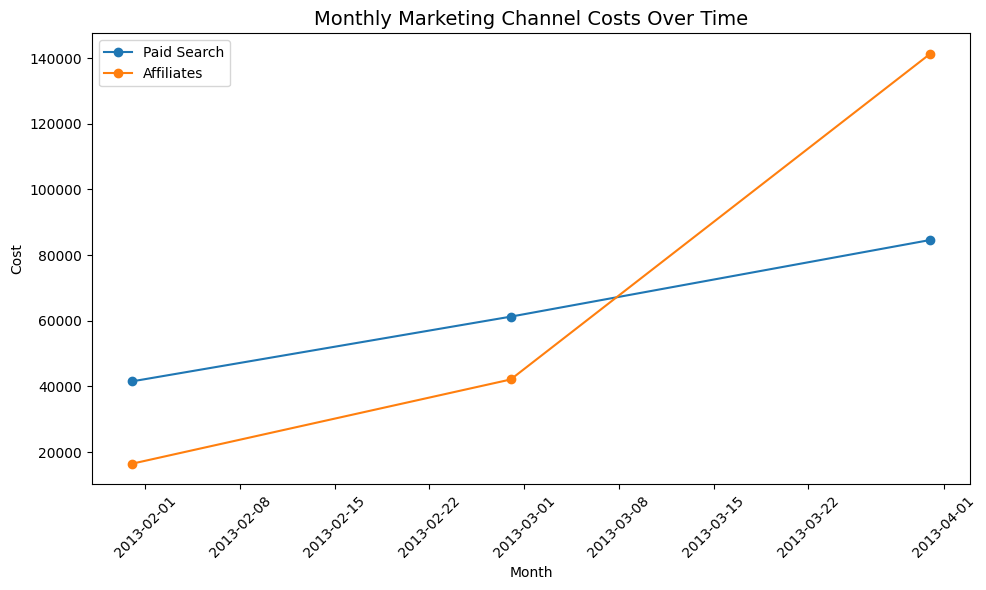

In [31]:
# Let's analyze marketing channel performance over time, focusing on the Paid Search and Affiliates channels.

# We'll calculate the total monthly costs and look for trends over the period available.
import matplotlib.pyplot as plt

# Plot the total costs over time for both channels
plt.figure(figsize=(10, 6))

plt.plot(cost_trend.index, cost_trend['Paid Search'], label='Paid Search', marker='o')
plt.plot(cost_trend.index, cost_trend['Affiliates'], label='Affiliates', marker='o')

# Add titles and labels
plt.title('Monthly Marketing Channel Costs Over Time', fontsize=14)
plt.xlabel('Month')
plt.ylabel('Cost')
plt.legend()

# Show the plot
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [33]:
import pandas as pd
from IPython.display import display  # For displaying dataframes in Jupyter

# Extract the customer acquisition source to match customers with marketing channels
customer_source = demographic_info_df[['Customer ID', 'Source of Customer']]

# Merge this with the value_info_df to include profit data and customer acquisition source
merged_df_with_source = pd.merge(value_info_df, customer_source, on='Customer ID')

# Calculate the total number of customers from each source and total subsequent orders from each source
conversion_summary = merged_df_with_source.groupby('Source of Customer').agg(
    total_customers=('Customer ID', 'count'),
    total_orders=('Subsequent Orders Count', 'sum'),
    total_first_order_profit=('1st Order Profit', 'sum'),
    total_subsequent_order_profit=('Subsequent Order Profit', 'sum')
).reset_index()

# Filter the data for Paid Search and Affiliates only
conversion_summary_filtered = conversion_summary[conversion_summary['Source of Customer'].isin(['Paid Search', 'Affiliates'])]

# Calculate conversion rates as the ratio of total orders to total customers
conversion_summary_filtered['conversion_rate'] = conversion_summary_filtered['total_orders'] / conversion_summary_filtered['total_customers']

# Display the result
print("Paid Search vs Affiliates Conversion Rates:")
display(conversion_summary_filtered)


Paid Search vs Affiliates Conversion Rates:


C:\Users\sunda\AppData\Local\Temp\ipykernel_27552\1268523870.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  conversion_summary_filtered['conversion_rate'] = conversion_summary_filtered['total_orders'] / conversion_summary_filtered['total_customers']


Source of Customer  total_customers  total_orders  total_first_order_profit  \
0         Affiliates             3756         15789               29766.67596   
3        Paid Search             6354         24905               69376.28180   

   total_subsequent_order_profit  conversion_rate  
0                  108543.676304         4.203674  
3                  236564.673760         3.919578

In [35]:
import pandas as pd
from IPython.display import display  # For displaying dataframes in Jupyter

# Assuming conversion_summary_filtered already has the relevant data from previous steps

# Step 1: Calculate total profit for each channel by summing first and subsequent order profits
conversion_summary_filtered['total_profit'] = (
    conversion_summary_filtered['total_first_order_profit'] + 
    conversion_summary_filtered['total_subsequent_order_profit']
)

# Step 2: Get the total cost for each channel from the cost_df
total_costs = cost_df[['Paid Search', 'Affiliates']].sum()

# Step 3: Map the costs back to the respective channels in the conversion summary
conversion_summary_filtered.loc[conversion_summary_filtered['Source of Customer'] == 'Paid Search', 'total_cost'] = total_costs['Paid Search']
conversion_summary_filtered.loc[conversion_summary_filtered['Source of Customer'] == 'Affiliates', 'total_cost'] = total_costs['Affiliates']

# Step 4: Calculate ROI for each channel
conversion_summary_filtered['ROI'] = (conversion_summary_filtered['total_profit'] - conversion_summary_filtered['total_cost']) / conversion_summary_filtered['total_cost']

# Step 5: Display the result
print("Paid Search vs Affiliates ROI:")
display(conversion_summary_filtered)


Paid Search vs Affiliates ROI:


C:\Users\sunda\AppData\Local\Temp\ipykernel_27552\3256379748.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  conversion_summary_filtered['total_profit'] = (
C:\Users\sunda\AppData\Local\Temp\ipykernel_27552\3256379748.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  conversion_summary_filtered.loc[conversion_summary_filtered['Source of Customer'] == 'Paid Search', 'total_cost'] = total_costs['Paid Search']
C:\Users\sunda\AppData\Local\Temp\ipykernel_27552\3256379748.py:20: SettingWithCopyWarning: 
A

Source of Customer  total_customers  total_orders  total_first_order_profit  \
0         Affiliates             3756         15789               29766.67596   
3        Paid Search             6354         24905               69376.28180   

   total_subsequent_order_profit  conversion_rate   total_profit  total_cost  \
0                  108543.676304         4.203674  138310.352264   199843.00   
3                  236564.673760         3.919578  305940.955560   187352.88   

        ROI  
0 -0.307905  
3  0.632966

In [45]:
import pandas as pd
from IPython.display import display  # For displaying dataframes in Jupyter

# Step 1: Ensure 'Age' is calculated in demographic_info_df
demographic_info_df['Date Of Birth'] = pd.to_datetime(demographic_info_df['Date Of Birth'])
demographic_info_df['Age'] = (pd.Timestamp.now() - demographic_info_df['Date Of Birth']).dt.days // 365

# Step 2: Merge value_info_df with demographic_info_df to include 'Age' and 'Source of Customer'
merged_df_with_source = pd.merge(value_info_df, demographic_info_df[['Customer ID', 'Age', 'Address City', 'Source of Customer']], on='Customer ID')

# Step 3: Filter data for Affiliates channel only
affiliates_customers = merged_df_with_source[merged_df_with_source['Source of Customer'] == 'Affiliates']

# Step 4: Group data by demographic attributes such as Age and Address City to analyze profit and orders
affiliates_demo_analysis = affiliates_customers.groupby(['Age', 'Address City']).agg(
    total_customers=('Customer ID', 'count'),
    total_first_order_profit=('1st Order Profit', 'sum'),
    total_subsequent_order_profit=('Subsequent Order Profit', 'sum'),
    total_orders=('Subsequent Orders Count', 'sum')
).reset_index()

# Step 5: Add a column for total profit (first order + subsequent orders)
affiliates_demo_analysis['total_profit'] = affiliates_demo_analysis['total_first_order_profit'] + affiliates_demo_analysis['total_subsequent_order_profit']

# Step 6: Display the demographic analysis for Affiliates customers
print("Affiliates Demographics Analysis:")
display(affiliates_demo_analysis)


Affiliates Demographics Analysis:


Age Address City  total_customers  total_first_order_profit  \
0     31       Dublin               37                 297.83180   
1     31     Limerick                3                  19.22760   
2     32      Athlone                2                  19.83912   
3     32  Ballinasloe                3                  15.99360   
4     32    Castlebar                3                  16.56200   
..   ...          ...              ...                       ...   
218   88       Dublin                2                  21.63840   
219   89       Dublin                3                  24.36840   
220   91       Dublin                2                   7.63560   
221   92    Newbridge                6                  51.13080   
222  107       Dublin                3                  24.68200   

     total_subsequent_order_profit  total_orders  total_profit  
0                       966.443856           171   1264.275656  
1                        94.155264            12    113.382864  
2                         0.000000             0     19.839120  
3                        65.705472            12     81.699072  
4                       120.829296            14    137.391296  
..                             ...           ...           ...  
218                      18.506880             4     40.145280  
219                     217.244160            16    241.612560  
220                      78.865920             6     86.501520  
221                     128.038400            18    179.169200  
222                      29.400000            12     54.082000  

[223 rows x 7 columns]